In [1]:
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
pd.DataFrame(boston.data, columns=boston.feature_names)

/Users/jumpei/.local/share/virtualenvs/ttt-7-LbpoMm1r/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs = train_test_split(boston.data, boston.target, test_size=0.2)
pd.DataFrame(train_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
1,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
2,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
3,13.07510,0.0,18.10,0.0,0.580,5.713,56.7,2.8237,24.0,666.0,20.2,396.90,14.76
4,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
5,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
6,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24
7,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39
8,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
9,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69


In [4]:
pd.DataFrame(test_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.24522,0.0,9.90,0.0,0.5440,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94
1,8.15174,0.0,18.10,0.0,0.7000,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85
2,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
3,0.10000,34.0,6.09,0.0,0.4330,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
4,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
5,0.18337,0.0,27.74,0.0,0.6090,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
6,0.07886,80.0,4.95,0.0,0.4110,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
7,0.63796,0.0,8.14,0.0,0.5380,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
8,0.26938,0.0,9.90,0.0,0.5440,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90
9,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44


In [5]:
pd.DataFrame(train_labels_bs)

,0
0,11.7
1,18.6
2,7.5
3,20.1
4,17.1
5,21.6
6,19.4
7,8.3
8,20.0
9,20.2


In [6]:
pd.DataFrame(test_labels_bs)

,0
0,19.8
1,11.5
2,45.4
3,33.1
4,50.0
5,7.0
6,37.3
7,18.2
8,21.6
9,50.0


In [7]:
forest = RandomForestRegressor()
forest.fit(train_data_bs, train_labels_bs)

train_labels_pred = forest.predict(train_data_bs)
test_labels_pred = forest.predict(test_data_bs)
pd.DataFrame(train_labels_pred)

,0
0,12.57
1,19.94
2,9.07
3,18.68
4,15.48
5,21.52
6,19.38
7,8.75
8,20.00
9,20.13


In [8]:
forest.score(test_data_bs, test_labels_bs)

0.890441483522672

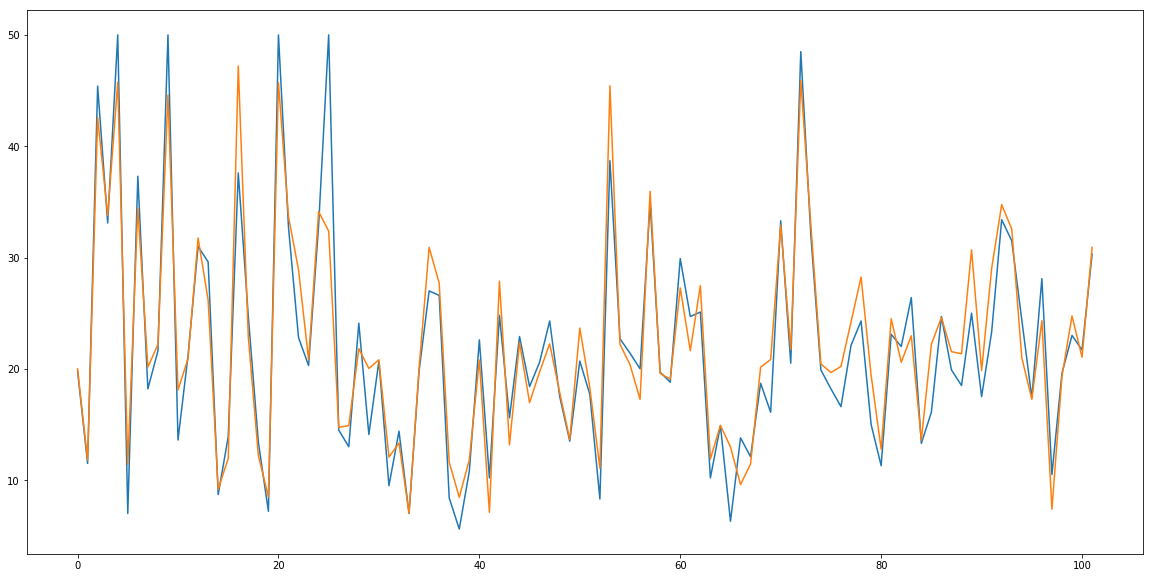

In [9]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(test_labels_pred, label="predicted")

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [3, 10, 100, 1000, 10000], 'n_jobs': [-1]}
cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    cv=10,
    scoring='mean_squared_error',
    n_jobs=-1,
    verbose=True
)
warnings.filterwarnings('ignore')
cv.fit(train_data_bs, train_labels_bs)

train_labels_pred = cv.predict(train_data_bs)
test_labels_pred = cv.predict(test_data_bs)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


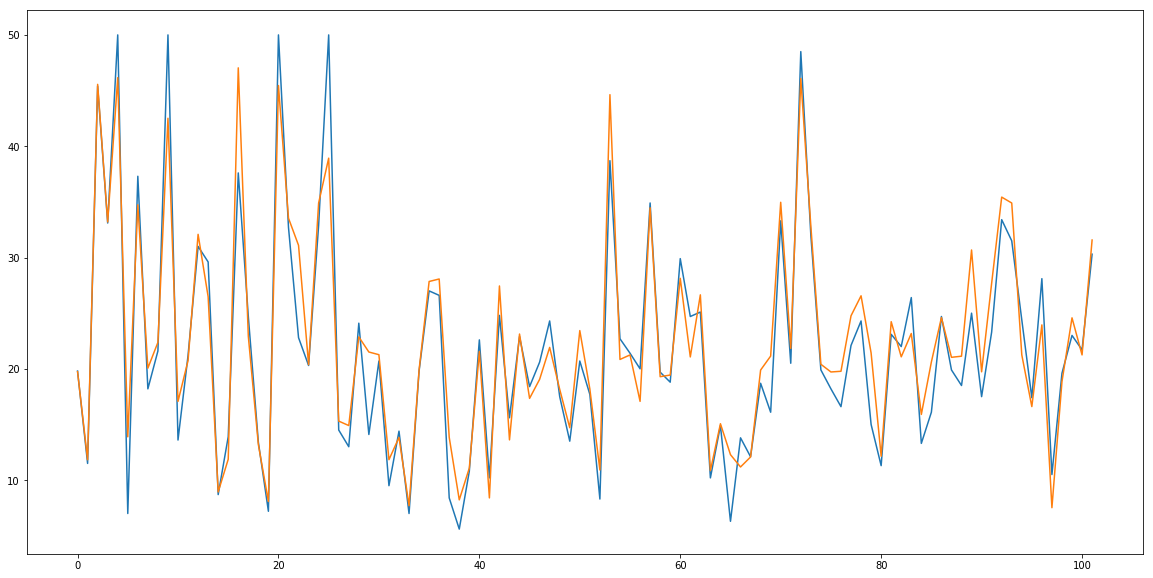

In [11]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(test_labels_pred, label="predicted")